In [76]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});
// für nummerierte/referenzierbare Gleichungen

<IPython.core.display.Javascript object>

# Projektaufgabe Interpolation

## Aufgabenstellung:

**Aufgabe 1** [10 Punkte] Implementieren Sie ein Python-Modul `interpol1d.py` , welches die folgenden Funktionalitäten bereitstellt:
+ Eine Funktion `polinterpol(x, xi, yi)` welche die  Auswertungen des Interpolationspolynoms mit Stützstellen `xi` und Stützwerten `yi` an den Stellen `x` zurückliefert. Der Grad des Polynoms ist dabei durch die Anzahl der Stützspunkte festgelegt. Die Berechnung soll in der Newtonbasis erfolgen. Achten sie auf eine effiziente Implementierung. 

+ Eine Funktion `splineinterpol(x, xi, yi)` , welche die Auswertungen des natürlichen kubischen Splines mit Stützstellen `xi` und Stützwerten `yi` an den Stellen `x` zurückliefert.

**Aufgabe 2** [10 Punkte] Vergleichen Sie experimentell die Approximationseigenschaften der kubischen Spline-Interpolation und der Polynominterpolation für die Rungefunktion 
$$
f(x) = \frac{1}{1 + x^2}, \quad x \in [-5, 5]
$$
für steigende $n$ (die Anzahl der Stützstellen sollte ungerade gewählt werden, damit das Maximum von $f$ interpoliert wird. Verwenden Sie dabei für die Polynominterpolation auch die Tschebischeffknoten). Visualisieren Sie einige Ergebnisse geeignet. Können Sie für die Spline-Interpolation die theoretische Fehlerordnung $\mathcal{O}(h^4)$ experimentell bestätigen (z.B. mit doppeltlogarithmischer Darstellung des experimentellen Fehlers über $h$)?

**Aufgabe 3** [10 Punkte] Stellen Sie in einem Projektbericht kurz das Thema der Polynom- und der Splineinterpolation vor (keine detaillierten Formeln, aber das konzeptionelle Vorgehen). Beschreiben Sie Besonderheiten der Implementierung (Aufgabe 1) und dokumentieren und interpretieren Sie die Ergebnisse (Aufgabe 2). Am Einfachsten ist es, den Projektbericht als Jupyter Notebook zu erstellen. Sie können aber auch eine PDF-Datei abgeben, in der Sie dann entsprechende Grafiken mit eingebunden hagen.

**Zusatzaufgabe** [5 Punkte] Splinekurven:
Beliebige Punkte in der Ebene, die nicht mehr notwendigerweise auf dem Graphen einer Funktion liegen, lassen sich wie folgt mit einem Spline interpolieren: Es wird getrennt für die x-Koordinaten und für die y-Koordinaten eine Splineinterpolierende berechnet. Dazu könnten z.B, die Indizes der Stützpunkte als die Knotenwerte einer Parametrisierung gewählt werden: Ein Spline $s_x$ interpoliert die Daten $(t_i, x_i$ ein zweiter Spline $s_y$ die Daten $(t_i, y_i$, mit $t_i = i$. Die Kurve 

$$
t \mapsto (s_x(t), s_y(t)), \quad t \in [0, n]
$$ 

interpoliert dann die Punkte $(x_i, y_i)$ in der Ebene. Führen Sie dies an ein paar Beispielen durch. Weitere Hinweise gerne in der Übung.

Es können maximal 30 Punkte erreicht werden - die Zusatzaufgabe kann also an anderer Stelle fehlende Punkte ausgleichen oder einfach nur Spaß machen.

## Hinweise:

**zu Aufgabe 1**
+ Die häufigsten möglichen Fehleingaben sollen mit einem Exception-Handling abgefangen werden. Die Ein- und Ausgabeparameter sind mit einem Docstring zu dokumentieren (so wie von Spyder vorgeschlagen beim Definieren einer neuen Funktion)
+ Sie können alle in den bisherigen Notebooks implementierten Funktionen als Ausgangspunkt verwenden
+ Bei der Funktion `splineinterpol(x, xi, yi)` können sie z.B in etwa folgendermaßen vorgehen, um jeweils den richtigen lokalen Spline (also das lokale kubische Polynom) auszuwerten (in einer Schleife über $j$):
```
# ind enthält alle Indizes von x-Werten, die in j.ten Intervall liegen:
ind    = np.nonzero( (xi[j] <= x) &  (x < xi[j+1]) )  
y[ind] = splinej(x[ind], j, xi, yi, mi)
```

**zu Aufgabe 2:** 
+ Die Ergebnisse sind geeignet in dem Projektbericht zu dokumentieren - entweder als Jupyter-Notebook, oder in einer PDF-Datei.

# Aufgabe 2

Ausführung:
Führen Sie zuerst den Block mit Imports und Helferfunktionen aus, danach den entsprechenden Block für die Teilaufgabe

In [2]:
from typing import Union
import numpy as np
from src.interpol1d import polinterpol, splineinterpol
import matplotlib.pyplot as plt

def runge(_x: Union[np.array, float]) -> Union[np.array, float]:
    """runge-funktion: https://en.wikipedia.org/wiki/Runge%27s_phenomenon"""
    return 1 / (1 + _x ** 2)


def tschebyscheff(a: float, b: float, x: Union[np.array, float]) -> Union[np.array, float]:
    """erzeugt tschebyscheff knoten für gegebene Stützwert(e) x
    
    a: linke Schranke des Intervalls
    b: rechte Schranke des Intervalls
    x: Stützwert(e)
    returns: Tschebyscheff-Knoten
    """
    return (((b-a) * (x+1))/2)+a


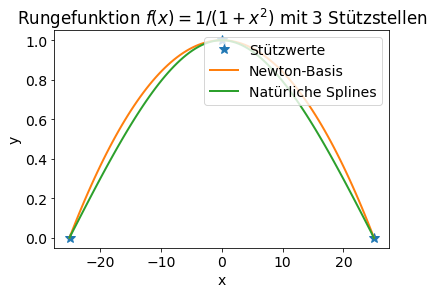

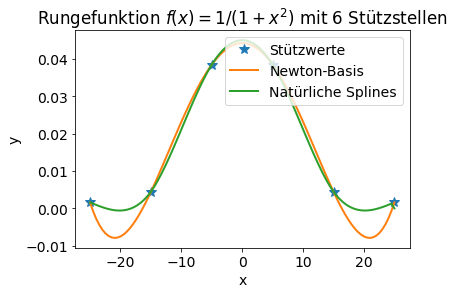

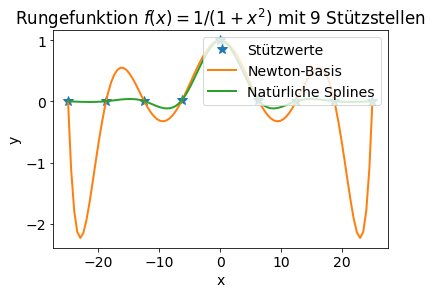

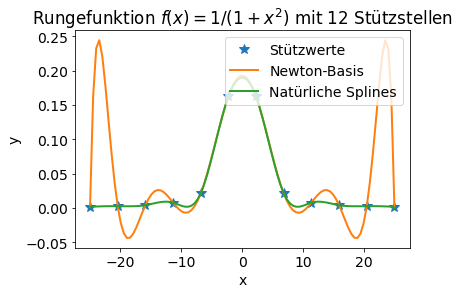

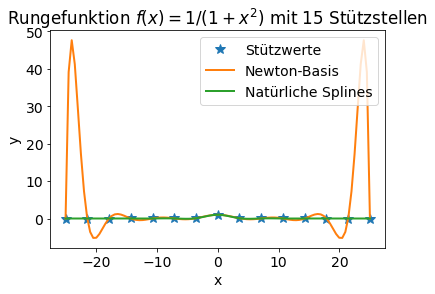

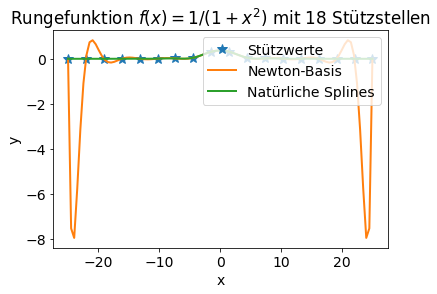

In [7]:
# Teilaufgabe a)
def eval_runge(n: int = 3, newton=True, spline=True):
    # Parameterwahl
    realX = np.linspace(-5, 5, n) # aequidistante Stuetzstellen im Intervall [-5, 5]
    xi = tschebyscheff(-5, 5, realX) # wahl der tschebyscheff stützpunkte
    yi = runge(xi)  # auswertung mit Funktion für Stuezstellen

    x = np.linspace(np.min(xi), np.max(xi), 100)  # zu interpolierende werte

    if newton:
        # Polynominterpolation mit Newton-Basis
        out_newton = polinterpol(x, xi, yi)
    if spline:
        # Splineinterpolation mit natürlichen Splines
        out_spline = splineinterpol(x, xi, yi)

    # Darstellung
    plt.rcParams.update({'font.size': 14})
    plt.plot(xi, yi, '*', label='Stützwerte', linewidth=2, markersize=10)
    if newton:
        plt.plot(x, out_newton, label='Newton-Basis', linewidth=2)
    if spline:
        plt.plot(x, out_spline, label='Natürliche Splines', linewidth=2)
    plt.legend(loc='upper right')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Rungefunktion $f(x) = 1/(1+x^2)$ mit {len(realX)} Stützstellen')
    plt.show()


for i in range(3, 21, 3):
    eval_runge(i)


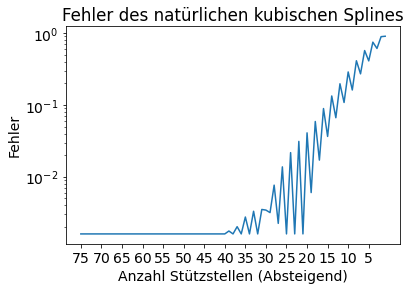

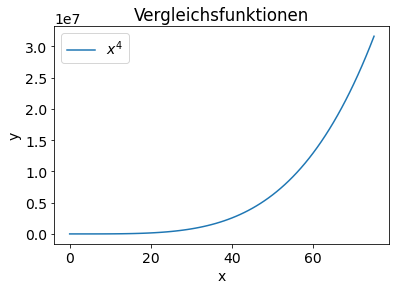

In [74]:
# Teilaufgabe b)
def eval_big_O(n: int = 3):
    # Parameterwahl
    realX = np.linspace(-5, 5, n) # aequidistante Stuetzstellen im Intervall [-5, 5]
    xi = tschebyscheff(-5, 5, realX) # wahl der tschebyscheff stützpunkte
    yi = runge(xi)  # auswertung mit Funktion für Stuezstellen

    x = np.linspace(np.min(xi), np.max(xi), 100)  # zu interpolierende werte

    # Splineinterpolation mit natürlichen Splines
    out_spline = splineinterpol(x, xi, yi)
    
    return np.linalg.norm(out_spline-runge(x), np.inf)


n = 75

err = np.zeros(n)

for i in range(len(err)):
    err[i] = eval_big_O(i*3+3)


err = np.flip(err)
# Darstellung
plt.rcParams.update({'font.size': 14})
plt.semilogy(err)
x = np.linspace(0, n, n+1)
#plt.loglog(x, -x**4 )
#plt.xlim(3, n)
#plt.legend(loc='upper right')
plt.xticks(np.arange(0, n, step=5), np.arange(n, 0, step=-5))
plt.xlabel('Anzahl Stützstellen (Absteigend)')
plt.ylabel('Fehler')
plt.title('Fehler des natürlichen kubischen Splines')
plt.show()

# zum Vergleich
x = np.linspace(0, n, n+1)
plt.plot(x, x**4 , label='$x^4$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Vergleichsfunktionen')
plt.show()

# Aufgabe 3: Projektbericht

# Interpolation

Eine Teilgebiet der numerischen Mathematik ist die Interpolation und Approximation von Funktionen anhand von paarweise verschiedenen, gegebenen Stützstellen
$$
(x_i, y_i).
$$
Hierfür gibt es verschiedene Arten und Methoden der Interpolation.
Im Folgenden werde ich auf zwei Methoden der Interpolation, die Polynominterpolation in der Newton-Basis und die Interpolation durch natürliche kubischen Splines, durch Beispiele genauer eingehen und deren Implementation in Python mit Hilfe von [`numpy`](https://numpy.org/) erläutern.

## Allgemein
Um eine Funktion zu Interpolieren werden $n+1$ paarweise verschiedene Stützstellen $(x_i, y_i)$ benötigt. Je nach Methode werden an die zu ermittelnde Funktion sogenannte Interpolationsbedingungen gestellt. Allgemein lässt sich jedoch für alle Methoden vorab definieren, dass jede erhaltene Funktion die Bedingungen
$$
f(x_i) = y_i \quad \forall i = 0, \dots, n
$$
erfüllen muss.  
Weiter lässt sich das allgemeine Interpolationspolynom durch
\begin{align}
    \label{eq:Interpolationspolynom}
    P(f|x_0,\dots,x_n)(x)
\end{align}
bezeichnen.



## Polynominterpolation
Bei der Polynominterpolation wird zu gegebenen Daten $(x_i, y_i), i = 0, \dots, n$ einer stetige Funktion $f$, $f(x_i)=y_i$ mit paarweise verschiedenen Stützwerten $x_i$ ein Polynom $p\in \Pi_n([a,b])$ bestimmt, welches die $n+1$ Interpolationsbedingungen
$$
    p(x_i) = f(x_i) = y_i, \quad i=0,\dots,n
$$
erfüllt.  
Hierfür kann aus verschiedene sogenannten Basen gewählt werden. Jede Basis hat ihre Vor- und Nachteile in Hinsicht auf die Erstellung des Polynoms oder die Auswertung des Polynoms an neuen Stellen. Ich beschränke mich im Folgenden jedoch auf die Newton-Basis, da diese Basis einen relativ geringen Aufwand zur Auswertung als auch zur Berechnung der benötigten Koeffizienten benötigt.
### Newton-Basis
Die Newton-Basis ist eine Mögliche Basis zur Polynominterpolation. Die Idee dabei ist, das Interpolationspolynom sukzessive aufzubauen um nach und nach alle $n+1$ Interpolationsbedingungen zu erfüllen.  

**Berechnung der Koeffizienten:**  
Man bezeichnet die $n+1$ Polynome
\begin{align}
    \omega_0(x) &= 1\\
    \omega_i(x) &= \prod \limits_{j=0}^{i-1}(x-x_j), \quad i = 1, \dots, n
\end{align}
als Newtonbasis von $\Pi_n$ bzgl. der Stützstellen $x_0, \dots, x_n$.

**Darstellung/Auswertung des Polynoms:**  
Die Newton-Darstellung, die Darstellung in der Newton-Basis, lautet dadurch
\begin{align}
    P(f|x_0,\dots,x_n)(x) = \sum \limits_{i=0}^n b_i\omega_i(x).
\end{align}
was gleichzeitig die Auswertung des Polynoms für Werte $x$ definiert.

### Implementierung
Wie bereits theoretisch besprochen wird nun die Newton-Basis zur Interpolation von Funktionen an gegebenen paarweise verschiedenen Stützwerten $(x_i, y_i)$ in Python implementiert.  

In der Datei `interpol1d.py` zu finden ist die Funktion
```python
def polinterpol(x: np.array, xi: np.array, yi: np.array) -> np.array:
    """
    Bildet Interpolationspolynom in der Newton-Basis und wertet
    übergebene Werte aus.

    :param x:  zu approximierende Stellen
    :param xi: Stützwerte
    :param yi: Funktionswerte der Stützstellen
    :returns: Werte des Polynoms an den Stellen x 
    """
    ...
```
sie dient als Interface für den Nutzer und beinhaltet die gesamte Implementation der Newton-Basis.  
Innerhalb dieser Funktion zu finden ist
```python

def newton_base_coefficients() -> np.array:
    """
    Berechnung mit dem rekursiven Schema der dividierten Differenzen - iterativ implementiert

    :returns: Newton-Basiskoeffizienten für gegebene Stützwerte
    """
    ...
```
`newton_base_coefficients` wird benutzt um die Koeffizienten $b_i, i = 0, \dots, n$ zu berechnen. Dafür wurden die rekursiven dividierten Differenzen
\begin{align}
    f_{[x_r,\dots,x_s]} = \frac{f_{[x_{r+1},\dots,x_s]}-f_{[x_r,\dots,x_{s-1}]}}{x_s-x_r}
\end{align}
implementiert. Dadurch benötigen wir zur Berechnung der Koeffizienten einen Aufwand von $\mathcal{O}(n^2)$.  
Die Koeffizienten werden direkt an die Funktion
```python

def pol_eval_newton_horner(b: np.array) -> np.array:
    """ Polynomonauswertung in Newton-Basis mit Hornerschema

    :param b:       Newton-Basis-Koeffizienten des Polynoms
    :returns: Ausgewertete Funktionswerte
    """
    ...
```
weitergereicht. Diese Funktion wertet das Polynom mit Hilfe dieser Koeffizienten $b_i$ durch das Hornerschema aus.  
Dabei wird essenziell
\begin{align}
    P(f|x_0,\dots,x_n)(x) &= b_0 + (x-x_0)(b_1+(x-x_1)(\dots+(b_n + (x-x_{n-1}))))
\end{align}
mit einem Aufwand von $\mathcal{O}(n)$ berechnet.


## Spline-Interpolationsproblem
Eine andere Methode der Interpolation ist die Interpolation durch natürliche kubische Splines.
Im Gegensatz zur Polynominterpolation wird hier die zu ermittelnde Funktion in kleinere Teilfunktionen gespaltet, welche durch Paare aus Stützstellen erstellt werden. Genauer wird zu gegebenen Daten $(x_j, y_j), j=0,\dots,n$ eine stetige Funktion $s$ bestimmt, die auf jedem Teilintervall $I_j=[x_j, x_{j+1}]$ ein Polynom von Grad $\leq 1$ ist und die Interpolationsbedingungen
\begin{align}
    s(x_j)=y_j, \quad j=0, \dots, n
\end{align}
erfüllt.

## Kubische Splines

Eine Form dieser Splines sind die kubischen Splines, sie beschränken den Grad des Polynoms ihrer Teilintervalle auf $s_j\in \Pi_3$, wodurch $s_j''(x)\in \Pi_1$ gegeben ist. Weshalb weitere Forderungen an das resultierende Polynom gestellt werden
\begin{align}
    s'(x_j)&=s_j'(x_j)=s_{j-1}'(x_j)\\
    s''(x_j)&=s_j''(x_j)=s_{j-1}''(x_j)
\end{align}

## Natürlich kubische Splines
Erweiternd zu den bereits gestellten Forderungen wird bei den natürlich kubischen Splines
\begin{align}
    s''(x_0) = s''(x_n) = 0
\end{align}
gefordert.

**Berechnung**  
Wir betrachten im Folgenden vereinfachend äquidistante Stützstellen mit dem Abstand $h=x_{j+1} - x_j, j = 0,\dots,n-1$.  
Durch die Definition der kubischen Splines ist $s''$ stetig, woraus sich ergibt dass
\begin{align}
    m_j = s''(x_j) = s_j''(x_j)=s_{j-1}''(x_j)
\end{align}
Approximiert man das Polynom $s_j''(x) \in \Pi_1$ mit der Lagrange-Darstellung, gegeben durch
\begin{align}
    \sum \limits_{i=0}^1 y_i L_i(x) \in \Pi_1
    &= y_0 L_0(x) + y_1 L_1(x)\\
    &= y_0 \frac{x_{j+1}-x}{x_{j+1}-x_j} + y_1 \frac{x-x_j}{x_{j+1}-x_j}.
\end{align}

So erhält man mit $m_j$ und $x_{j+1}-x_j = h$
\begin{align}
    s_j''(x) &= m_j\frac{x_{j+1}-x}{h} + m_{j+1}\frac{x-x_j}{h}\\
    \Rightarrow \int \int s_j''(x) \text{d}x = s_j(x) &= m_j\frac{(x_{j+1}-x)^3}{6h} + m_{j+1}\frac{(x-x_j)^3}{6h} + c_1x + c_2.
\end{align}

Durch $s_j(x_j)=y_j \wedge s_j(x_{j+1})=y_{j+1}$ lässt sich $s_j$ definieren durch
\begin{align}
    \begin{split}
    \label{eq:spline}
        s_j(x) &= \frac{1}{6h}(m_j(x_{j+1}-x)^3 + m_{j+1}(x-x_j)^3) \\
        & + \frac{1}{h} (y_j(x_{j+1}-x) + y_{j+1}(x-x_j))\\
        & - \frac{h}{6}(m_j(x_{j+1} - x) + m_{j+1}(x-x_j))
    \end{split}
\end{align}

Zu letzt wird noch die Stetigkeit der 1. Ableitung
\begin{align}
    s'_{j+1}(x_j)=s'_j(x_j), \quad j=1, \dots, n-1
\end{align}
geforder.  
Die Forderung der 2. Ableitung $s''(x_0) = s''(x_n) = 0$ reduziert lediglich die Anzahl der Unbekannten $m_j$ da dadurch $m_0=m_n=0$ gegeben ist.

Zusammen ergibt sich eingesetzt das lineare Gleichungssystem für $n-1$ Unbekannte $m_1,\dots,m_{n-1}$:
\begin{align}
\begin{pmatrix}
\label{eq:lgs}
    4 & 1 \\
    1 & 4 & \ddots\\
    & \ddots & \ddots & 1\\
    & & 1 & 4
\end{pmatrix}
\begin{pmatrix}
    m_1\\
    m_2\\
    \vdots\\
    m_{n-1}
\end{pmatrix}
= \frac{6}{h^2}
\begin{pmatrix}
    y_0 - 2y_1 + y_2\\
    y_1-2y_2+y_3\\
    \vdots\\
    y_{n-2}-2y_{n-1}+y_n
\end{pmatrix}
\end{align}
### Implementierung
Wie auch die Polynominterpolation ist die Implementierung dieses Verfahrens in der Datei `interpol1d.py` zu finden.

Als Interface wird dem Nutzer die Funktion
```python

def splineinterpol(x: Union[np.array, float], xi: np.array, yi: np.array) -> Union[np.array, float]:
    """
    Auswertung des natürlichen kubischen Splines
    :param x : auszuwertende Stellen
    :param xi: Stützwerte
    :param yi: Stützstellen
    :returns: Ausgewertete Stellen x des natürlich kubischen Splines 
    """
    ...
```
zur Verfügung gestellt.  
Sie beinhaltet
```python
def curv(step_width: float) -> np.array:
    """
    Berechnung der zweiten Ableitungen an den Knoten
    :param step_width: äquidistante Schrittweite zwischen Stützwerten
    :returns: Koeffizienten m_i
    """
    ...
```

und berechnet die Koeffizienten $m_i, i = 1, ..., n-1$ mit Hilfe der 2. Ableitung $s''(x)$, durch Lösung des linearen Gleichungssystems \eqref{eq:lgs} mit dem Gauss-Seidel-Verfahren (hierfür wurde `numpy.linalg.solve` benutzt).

Des weiteren beinhaltet die Funktion `splineinterpol` auch
```python
def eval_spline_j(x_act: Union[np.array, float], index: int, m_i: np.array) -> Union[np.array, float]:
    """
    Auswertung des kubischen Polynoms s_{index}
    :param x_act: aktueller Stützwert
    :param index: index des Splines
    :param m_i:   koeffizienten des kubisch natürlichen Splines
    :returns:      Wert des Splines an gegebener Stelle
    """
    ...
```

was die Auswertung des kubischen Polynoms $s_j(x)$ für gegebene $x$ berechnet. Hierbei wurde die Gleichung \eqref{eq:spline} parametrisiert implementiert.  

Um aus den beiden Helfer-Funktionen `eval_spline_j` und `curv` die an `splineinterpol` übergebenen Werte `x` auszuwerten muss Schrittweise durch den Vektor der Stützwerte `xi` iteriert werden.
Während jeder Iteration werden die betroffenen Werte $x_{\text{act}} := \{\hat{x} \in x, | \hat{x} \in I_j[xi_j, xi_{j+1}], \text{bzw. } xi_j \leq \hat{x} \leq xi_{j+1}\}$, durch die Funktion `eval_spline_j` ausgewertet.

Aus effizienzgründen ließe sich die Bedingung in jeder Iteration auf
\begin{align}
    xi_{j} <= x < xi_{j + 1}
\end{align}
beschränken, da gilt $s_j(xi_{j}) = s_{j+1}(xi_{j})$.

#### Weitere details der Implementierung
Als Helfer wurde die Funktion `vec_size` implementiert, welche dazu dient die Größe eines Vektors zu ermitteln.

Zur Reduzierung von Abhängigkeiten des Moduls `interpol1d` wurde der Helfer `tridiag` implementiert.
Diese Funktion erstellt eine Tridiagonalmatrix der Form `[rows x cols]` mit Diagonalelementen $a_{i-1,i}=$ `lower`, $a_{i,i}=$ `center`, $a_{i,i+1}=$ `upper`. Alternativ könnte hierfür [`scipy.sparse.diags`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.diags.html) verwendet werden.

Des weiteren wurden spezielle Exception-Klassen (`WrongDimensionError, NotEquidistantSteps`) eingeführt um die Fehlerbehandlung einfacher zu gestalten.  

Um die Fehlerbehandlung für Eingabeparameter der Funktionen `polinterpol` und `splineinterpol` allgemein zu halten und den DRY-Prinzipien entsprechend wurde der Decorator `parameter_test_decorator` implementiert, er kann benutzt werden um vor einem Funktionsaufruf Tests nach einer minimalen Anzahl Stützstellen `min_elements`, gleicher Anzahl der Stützwerte `xi` und Stützstellen `yi` und äquidistanter Schrittweite zwischen den Stützwerten $xi_{j+1}, xi_{j}, j = 0, \dots, n-1$ durchzuführen.

Dafür wird die zu dekorierende Funktion mit dem Decorator wie folgt dekoriert
```python
@parameter_test_decorator()
def my_function(x, xi, yi):
    pass
```

## Beispiele
Nun möchte ich anhand eines speziellen Beispiels, der Runge Funktion 
\begin{align}
    f(x) = \frac{1}{1+x^2}, \quad \forall x\in[-5,5]
\end{align}
in Kombination mit Tschebyscheff Knoten für ein Intervall $I = [a, b]$
\begin{align}
    t(x) = \frac{b-a}{2} (x+1) + a,
\end{align}
die beiden Verfahren betrachten.

Für verschieden viele Stützwerte erhalten wir qualitativ unterschiedliche Ergebnisse für beide Verfahren. Dabei werden wir uns auf ungerade Anzahlen Stützwerte beschränken um das maximum der Funktion zu approximieren.

Betrachten wir zunächst 3 Stützwerte, so erhalten wir für die Newton-Basis

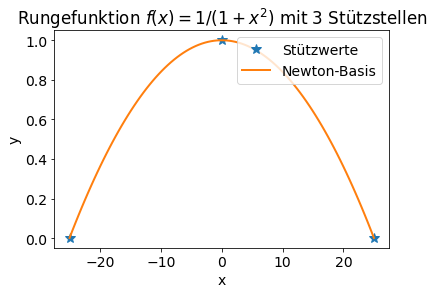

In [8]:
eval_runge(3, spline=False)

Dies Interpoliert die Stützwerte zunächst optisch sehr gut.  
Erhöht man die Anzahl der Stützwerte auf 5, so erhält man

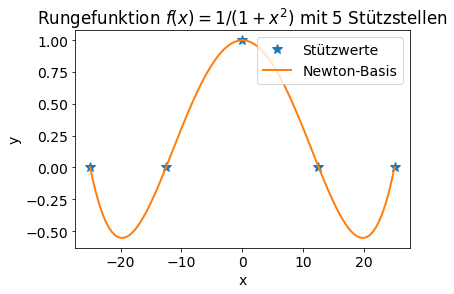

In [9]:
eval_runge(5, spline=False)

optisch gesehen noch eine gute Approximation, es wird jedoch bereits deutlich wie die Erhöhung der Anzahl der Stützwerte zu einem ungenauen Wert an den Rändern führen könnte.

Erhöht man die Anzahl Stützwerte weiter

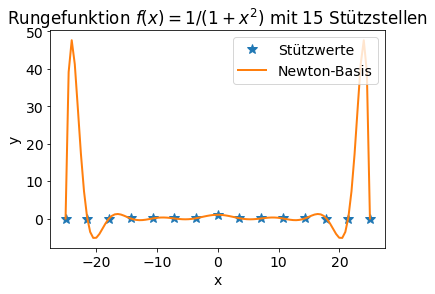

In [10]:
eval_runge(15, spline=False)

Vorherige Annahme wird nun verstärkt, an den Rändern osziliert die Lösung sehr stark, gegen den Nullpunkt liefert die Newton-Basis jedoch eine relativ gute Approximation.

Vergleicht man dies nun mit den kubisch normalen Splines. So weicht die Lösung für $n=3$ zunächst optisch ein wenig ab

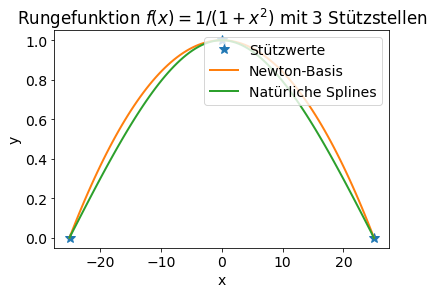

In [11]:
eval_runge(3)

Mit zunehmender Anzahl der Stützwerte

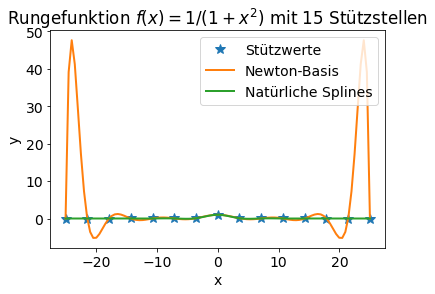

In [13]:
eval_runge(15)

Liefert der kubisch natürliche Spline jedoch bessere Ergebnisse, auch an den Randwerten.

Des weiteren lässt sich durch optische Überprüfung zeigen, dass der kubisch natürliche Spline die theoretische Fehlerordnung $\mathcal{O}(h^4)$ besitzt.

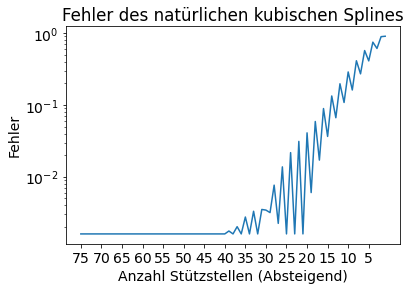

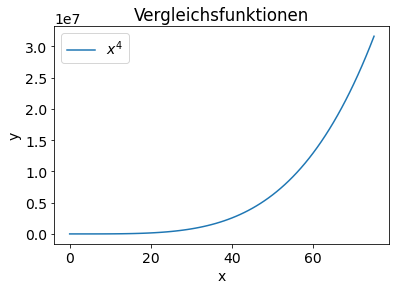

In [72]:
n = 75

err = np.zeros(n)

for i in range(len(err)):
    err[i] = eval_big_O(i*3+3)


err = np.flip(err)
# Darstellung
plt.rcParams.update({'font.size': 14})
plt.semilogy(err)
x = np.linspace(0, n, n+1)
#plt.loglog(x, -x**4 )
#plt.xlim(3, n)
#plt.legend(loc='upper right')
plt.xticks(np.arange(0, n, step=5), np.arange(n, 0, step=-5))
plt.xlabel('Anzahl Stützstellen (Absteigend)')
plt.ylabel('Fehler')
plt.title('Fehler des natürlichen kubischen Splines')
plt.show()

# zum Vergleich
x = np.linspace(0, n, n+1)
plt.plot(x, x**4 , label='$x^4$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Vergleichsfunktionen')
plt.show()

Hierbei wurde der Spline mit absteigender Anzahl Stützwerten konstruiert, während jedes Iterationsschritts wurde dann der konstruierte Spline $s(x)$ mit dem tatsächlichen Funktionswert der Rungefunktion $r(x)$ durch
\begin{align}
    ||r(x) - s(x)||_\infty
\end{align}
verglichen.  
Vergleicht man den doppel-logarithmischen Plot des Fehlers des Splines mit der Funktion $x^4$ so lässt sich vermuten dass der Spline wohlmöglich eine Fehlerordnung von $\mathcal{O}(h^4)$ besitzt